<a href="https://colab.research.google.com/github/HardProxy/ANN-Handwritten/blob/main/DesafioDSBRIGADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste Técnico - DS Brigade 

Início : 03/08/2021 - Fim : 03/08/2021

**Nome** : Otaviano Cruz

**Email** : otaviano.cruz@id.uff.br / otaviano.cruz1997@gmail.com

**GitHub** : https://github.com/HardProxy

**Planejamento (Tempo gasto em cada tarefa)** :

1. Download e descompactação dos arquivos .csv. (15 min)
2. Estudo da Estrutura dos dados. (2 hrs)
3. Adequação dos dados para palavras significativas para cada ano **2016-2019** para o arquivo item.csv. (4 hrs) 
4. Construção de Gráficos de barra para responder as perguntas

**Perguntas**:

- Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul? (10 min)
- É possível identificar algum padrão nas compras? Seja por época do ano ou por tipo de órgão comprador? (10 min)
- O que mais é possível descobrir sobre as licitações do estado? (10 min)

**Referências e Documentações**:

1. Livros :

- Rachel Schutt, Cathy O'Neil - *Doing Data Science* - O'Reilly Media (2013)
- Rachel Schutt, Cathy O'Neil - *Python for Data Analysis* - O'Reilly Media(2013)

2. Documentações :

- Pandas - https://pandas.pydata.org/docs/
- Matplotlib - https://matplotlib.org/stable/contents.html
- NLTK - https://www.nltk.org/

**Próximos Passos (Modelos)** :
- Aplicação de NLP para identificar palavras-chaves nas descrições dos itens (arquivo : item.csv / coluna : DS_ITEM), como forma de automatizar a adequação dos dados.
- Aplicação de algoritmos de Machine Learning (ANN, por exemplo) para que, a partir das palavras-chaves obtidas pelo item acima, para diferenciar aquelas licitações direcionadas à adiquirir materiais e aquelas que são direcioandas à prestação de serviço.

# Importação de Módulos

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Download e Descompactação dos arquivos

Realizando o Download dos arquivos de 2016-2019 e destinando ao meu Google Drive foi possível descompactar os arquivos de extensão .zip e assim ter acesso ao conteúdo.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

if __name__ == "__main__":
    file_id =  '1NGpVRqo9xbvEUSzR9KWOOf4V6GeBc5a7'#'TAKE ID FROM SHAREABLE LINK'
    destination = '/content/drive/MyDrive/DesafioDSBRIGADE/2019.zip' #'DESTINATION FILE ON YOUR DISK'
    download_file_from_google_drive(file_id, destination)


In [4]:
!cd /content/drive/MyDrive/DesafioDSBRIGADE/

In [5]:
!mkdir 2016 2017 2018 2019

In [6]:
cd 2016

/content/2016


In [7]:
!unzip /content/drive/MyDrive/DesafioDSBRIGADE/2016.zip

Archive:  /content/drive/MyDrive/DesafioDSBRIGADE/2016.zip
  inflating: documento_lic.csv       
  inflating: dotacao_lic.csv         
  inflating: evento_lic.csv          
  inflating: item.csv                
  inflating: item_prop.csv           
  inflating: licitacao.csv           
  inflating: licitante.csv           
  inflating: lote.csv                
  inflating: lote_prop.csv           
  inflating: proposta.csv            
  inflating: comissao.csv            
  inflating: membrocons.csv          
  inflating: memcomissao.csv         
  inflating: pessoas.csv             


In [8]:
cd ..

/content


In [9]:
cd 2017

/content/2017


In [10]:
!unzip /content/drive/MyDrive/DesafioDSBRIGADE/2017.zip

Archive:  /content/drive/MyDrive/DesafioDSBRIGADE/2017.zip
  inflating: documento_lic.csv       
  inflating: dotacao_lic.csv         
  inflating: evento_lic.csv          
  inflating: item.csv                
  inflating: item_prop.csv           
  inflating: licitacao.csv           
  inflating: licitante.csv           
  inflating: lote.csv                
  inflating: lote_prop.csv           
  inflating: proposta.csv            
  inflating: comissao.csv            
  inflating: membrocons.csv          
  inflating: memcomissao.csv         
  inflating: pessoas.csv             


In [11]:
cd ..

/content


In [12]:
cd 2018

/content/2018


In [13]:
!unzip /content/drive/MyDrive/DesafioDSBRIGADE/2018.zip

Archive:  /content/drive/MyDrive/DesafioDSBRIGADE/2018.zip
  inflating: documento_lic.csv       
  inflating: dotacao_lic.csv         
  inflating: evento_lic.csv          
  inflating: item.csv                
  inflating: item_prop.csv           
  inflating: licitacao.csv           
  inflating: licitante.csv           
  inflating: lote.csv                
  inflating: lote_prop.csv           
  inflating: proposta.csv            
  inflating: comissao.csv            
  inflating: membrocons.csv          
  inflating: memcomissao.csv         
  inflating: pessoas.csv             


In [14]:
cd ..

/content


In [15]:
cd 2019

/content/2019


In [16]:
!unzip /content/drive/MyDrive/DesafioDSBRIGADE/2019.zip

Archive:  /content/drive/MyDrive/DesafioDSBRIGADE/2019.zip
  inflating: documento_lic.csv       
  inflating: dotacao_lic.csv         
  inflating: evento_lic.csv          
  inflating: item.csv                
  inflating: item_prop.csv           
  inflating: licitacao.csv           
  inflating: licitante.csv           
  inflating: lote.csv                
  inflating: lote_prop.csv           
  inflating: proposta.csv            
  inflating: comissao.csv            
  inflating: membrocons.csv          
  inflating: memcomissao.csv         
  inflating: pessoas.csv             


In [17]:
cd ..

/content


# 2016

Carregando arquivos **item.csv** e **licitacao.csv** em uma estrutura de dataframe do módulo **Pandas** :

In [18]:
cd 2016

/content/2016


In [19]:
df_item = pd.read_csv('/content/2016/item.csv')
df_licitacao = pd.read_csv('/content/2016/licitacao.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_item.info()

In [ ]:
df_licitacao.info()

### Item.csv

Na coluna *DS_ITEM* existe a mistura entre licitações de **materiais** e de **serviços**. Além disso, existem várias licitações que compram o mesmo tipo de produto. 


Esse tipo de problema pode ser abordado de 2 maneiras : 

1. Processamento de Linguagem Natural (NLP).
2. Coleta manual de palavras significativas.

Na primeira abordagem realiza a tokenização das descrições das licitações e informa as palavras mais significativas daquela sentença. Esse tipo de abordagem necessita de mais tempo para a criação de um modelo de aprendizado de máquina. Isso possibilita a automatização do processo de adequação dos dados.

Na segunda abordagem, as palavras significativas das sentenças serão definidas manualmente. Isso permite que para respostas em curto prazo esse tipo de abordagem seja mais adequada. 

#### Frequência de Palavras 

Aqui o objetivo é observar a frequência de palavras e assim realizar a adequação dos dados.

In [20]:
frases=df_item.DS_ITEM.unique()

In [21]:
palavras = []
for sec in frases : 
  palavras+=sec.split()

In [22]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [23]:
for word in palavras:
  fdist[word.lower()]+=1

In [24]:
len(fdist)

231372

Selecionando as 250 palavras mais frequentes na coluna DS_ITEM do dataframe

In [ ]:
fdist_most = fdist.most_common(250)
fdist_most

Criando um lista com palavras significativas :

In [36]:
sig_word = ['pneu','luva','folhas','água','cloridrato','agulha','leite','motor','borracha','impressora','farinha','carne','pasta','cola','broca','cartucho','parafuso','caneta','algodão']

Após contabilizar a frequência das palavras presentes na coluna DS_ITEM  serão trocadas as descrições por palavras únicas e significativas. 

In [46]:
df_item["DS_ITEM"] = df_item.DS_ITEM.str.lower()

In [48]:
for i  in sig_word :
  df_item.DS_ITEM.replace( '(^'+i+'.*)',i, regex=True, inplace=True) 

Isso irá permitir criar um histograma de bens materiais litados durante o ano de 2016. Respondendo assim a primeira pergunta do teste.

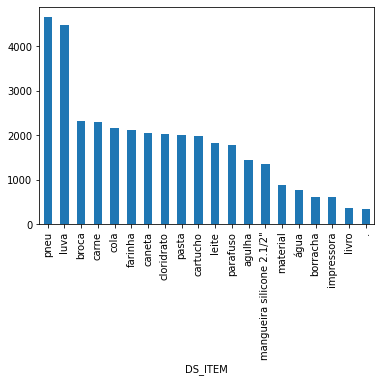

In [57]:
df_item.groupby("DS_ITEM").NR_LICITACAO.count().sort_values(ascending=False)[:20].plot(kind="bar")

Este gráfico de barras nos permite inferir que o item mais licitado é o PNEU, seguido de LUVA e BROCA. Mostrando também que materiais de escritório também são licitados (PASTA, CARTUCHO, BORRACHA, COLA).

### licitacao.csv 

Analisando este documento podemos responder a segunda pergunta. Já que é com ele que temos informações a respeito dos órgãos que realizaram as licitações.

#### Distribuição Temporal de Licitações

In [26]:
df_licitacao["DT_ADJUDICACAO"]=pd.to_datetime(df_licitacao.DT_ADJUDICACAO)

In [27]:
df_licitacao =  df_licitacao.sort_values(by="DT_ADJUDICACAO")

In [29]:
df_licitacao.groupby("DT_ADJUDICACAO").NM_ORGAO.count()

DT_ADJUDICACAO
2015-02-02     1
2016-01-04    30
2016-01-05     2
2016-01-06     1
2016-01-11     1
              ..
2019-02-15     1
2019-04-03     1
2019-04-18     1
2019-06-16     1
2019-11-25     1
Name: NM_ORGAO, Length: 438, dtype: int64

In [30]:
time_interval = [pd.datetime.strftime(i, "%d-%m-%Y") for i in df_licitacao.groupby("DT_ADJUDICACAO").NM_ORGAO.count().index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


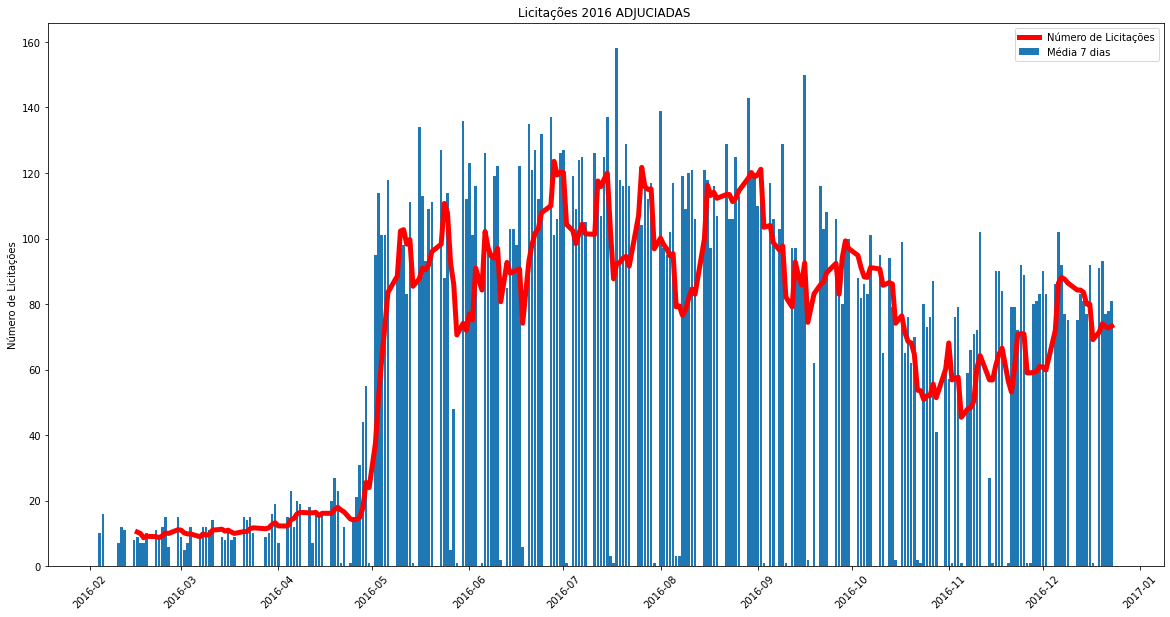

In [81]:
plt.figure(figsize=(20,10))
plt.title("Licitações 2016 ADJUCIADAS ")
plt.ylabel("Número de Licitações")
plt.xticks(rotation=45)
plt.bar(df_licitacao.groupby("DT_ADJUDICACAO").NM_ORGAO.count().index[20:270],df_licitacao.groupby("DT_ADJUDICACAO").NM_ORGAO.count()[20:270])
plt.plot(df_licitacao.groupby("DT_ADJUDICACAO").NM_ORGAO.count().index[20:270],df_licitacao.groupby("DT_ADJUDICACAO").NM_ORGAO.count()[20:270].rolling(7).mean(),'r-',lw=5)
plt.legend(['Número de Licitações','Média 7 dias' ])

Aqui podemos observar que há um crescimento repentínuo no número de licitçaões ocorrem entre os meses de Maio e Outubro. Do final de Outubro até o final do ano há uma redução no número de licitações, mais ainda acima do número obtidos no início do ano. O comportamento médio, num intervalo de 7 dias, é representado pela curva em vermelho.

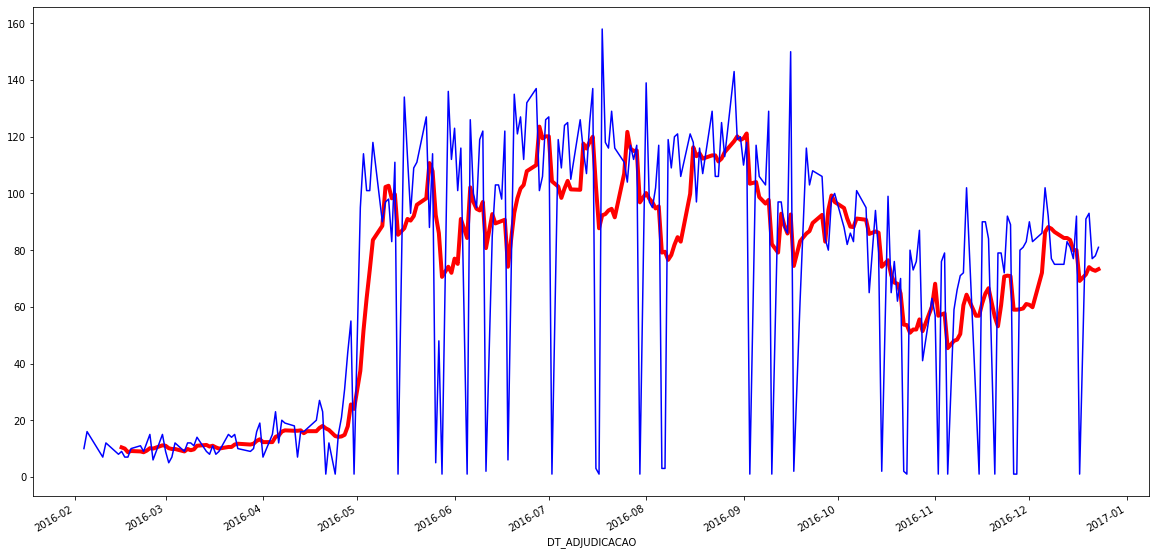

In [74]:
df_licitacao.groupby("DT_ADJUDICACAO").NM_ORGAO.count()[20:270].rolling(7).mean().plot(figsize=(20,10),lw = 4,color='red')
df_licitacao.groupby("DT_ADJUDICACAO").NM_ORGAO.count()[20:270].plot(color='blue')

#### Distribuição de Compradores 

Os 10 Órgãos que mais compraram no ano de 2016 podem ser listados pelo gráfico de barras abaixo, em ordem decrescente : 

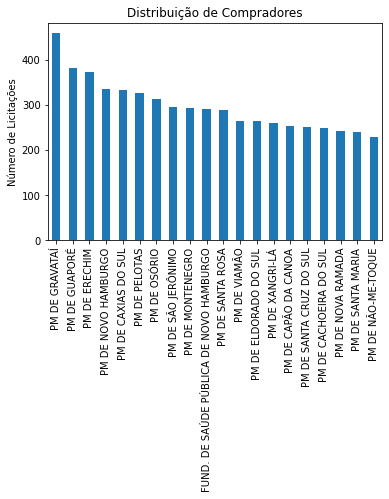

In [58]:
df_licitacao.groupby("NM_ORGAO").NR_LICITACAO.count().sort_values(ascending=False)[:20].plot(kind='bar',xlabel="",ylabel="Número de Licitações", title="Distribuição de Compradores")

Aqui podemos observar que a PM de Gravataí é o órgão que mais realiza o procesos licitatório em 2016, seguido da PM de Guaporé.